In [1]:
import cv2
print(cv2.__version__)

4.5.5


In [7]:
import numpy as np
from scipy.ndimage import filters
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from PIL import Image, ImageChops

In [5]:
# image processing

# scanning function

def showpic(image, width = 10):
    plt.figure(figsize=(width, width/1000 * 727))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()


def showlist(tiles, width = 10):
    n_rows = np.ceil(len(tiles) / 5).astype('int')
    plt.figure(n_rows, 5, figsize=(width, width))
    for i in range(len(tiles)):
        plt.subplot(n_rows, 5, i+1)
        plt.axis('off')
        plt.title(str(i))
        plt.imshow(tiles[i])
    plt.show()

    

(778, 1082, 4)


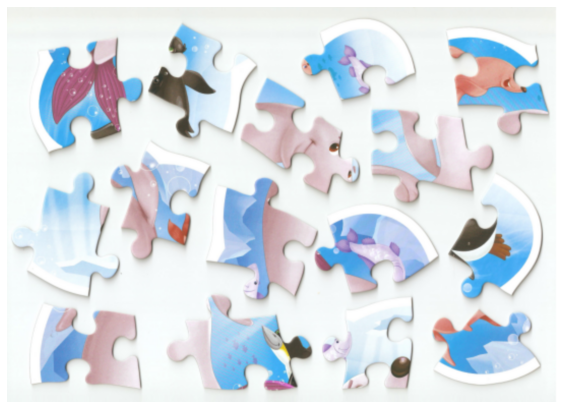

In [8]:
# load scanned tiles
puzzle = np.array(Image.open('sample.png').convert('RGBA'))
print(puzzle.shape)
showpic(puzzle)

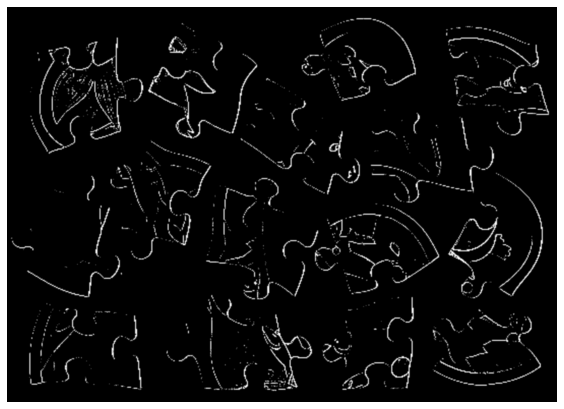

In [12]:
# adaptive thresholding

threshold = cv2.cvtColor(puzzle, cv2.COLOR_RGBA2GRAY)   # convert to grayscale
threshold = cv2.adaptiveThreshold(threshold, 255, 0, 1, 3, 3)   # 0: binary, 1: gaussian
threshold = cv2.GaussianBlur(threshold, (3, 3), 1)  # remove noise
showpic(threshold)

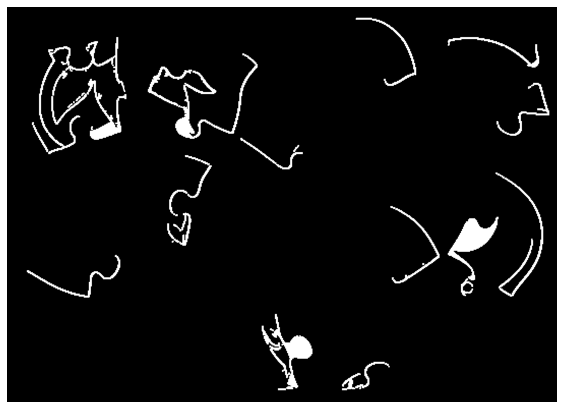

In [13]:
# Find and fill contours
contours, _ = cv2.findContours(threshold, 0, 1)
sorted = sorted([[cnt.shape[0], i] for i, cnt in enumerate(contours)], reverse=True)[:15] 
biggest = [contours[s[1]] for s in sorted]  
fill = cv2.drawContours(np.zeros(puzzle.shape[:2]), biggest, -1, 255, thickness=cv2.FILLED) 
showpic(fill)